In [1]:
import requests 
import pandas as pd

In [20]:
API_KEY = '0b808512c3ff2f3fa0aee5a4867f072f'
city = "London"
url = f"http://api.openweathermap.org/data/2.5/forecast?q=London&appid=0b808512c3ff2f3fa0aee5a4867f072f&units=metric"
response = requests.get(url)
data = response.json()

In [21]:
# Quick check
if response.status_code == 200:
    print("API call successful!")
else:
    print(f"Error: {response.status_code}")

API call successful!


In [22]:
forecast_list = data["list"]
records = []
for entry in forecast_list:
    records.append({
        "datetime": entry["dt_txt"],
        "temperature": entry["main"]["temp"],
        "humidity": entry["main"]["humidity"],
        "wind_speed": entry["wind"]["speed"]
    })

df = pd.DataFrame(records)

In [23]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["day"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour

In [51]:
df.head()

,datetime,temperature,humidity,wind_speed,day,hour
0,2025-09-10 18:00:00,16.80,84,4.20,2025-09-10,18
1,2025-09-10 21:00:00,16.63,88,4.92,2025-09-10,21
2,2025-09-11 00:00:00,13.27,86,4.64,2025-09-11,0
3,2025-09-11 03:00:00,12.18,90,4.15,2025-09-11,3
4,2025-09-11 06:00:00,9.90,87,3.69,2025-09-11,6


In [48]:
df.describe()

,datetime,temperature,humidity,wind_speed,hour
count,40,40.000000,40.000000,40.000000,40.000000
mean,2025-09-13 04:30:00,14.790750,73.375000,5.714500,10.500000
min,2025-09-10 18:00:00,9.900000,46.000000,3.160000,0.000000
25%,2025-09-11 23:15:00,13.257500,63.250000,4.527500,5.250000
50%,2025-09-13 04:30:00,14.510000,75.000000,5.220000,10.500000
75%,2025-09-14 09:45:00,16.710000,84.250000,7.552500,15.750000
max,2025-09-15 15:00:00,18.220000,95.000000,9.490000,21.000000
std,NaN,2.198373,13.082945,1.738502,6.961432


In [47]:
df.isnull().sum()

datetime       0
temperature    0
humidity       0
wind_speed     0
day            0
hour           0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [37]:
#Fill missing values
df['temperature'].fillna(df['temperature'].mean(), inplace = True)
df['humidity'].fillna(df['temperature'].mean(), inplace = True)
df['wind_speed'].fillna(df['temperature'].mean(), inplace = True)

In [60]:
#Analysis
#Daily Average Tempereature, Humidity, Wind speed
daily_summary = df.groupby('day')[['temperature', 'humidity', 'wind_speed']].mean().reset_index()
daily_summary.columns = ['Day', 'Avg_Temperature', 'Avg_Humidity', 'Avg_Wind_Speed']

In [64]:
hourly_summary = df.groupby('hour')[['temperature', 'humidity', 'wind_speed']].mean().reset_index()

In [66]:
daily_summary

,Day,Avg_Temperature,Avg_Humidity,Avg_Wind_Speed
0,2025-09-10,16.71500,86.000,4.56000
1,2025-09-11,14.17125,73.875,4.80750
2,2025-09-12,14.24375,68.000,4.52125
3,2025-09-13,14.83000,72.875,5.26875
4,2025-09-14,15.08500,83.000,6.90625
5,2025-09-15,15.26000,63.500,7.90500


In [67]:
hourly_summary

,hour,temperature,humidity,wind_speed
0,0,13.158,80.2,5.120
1,3,12.722,82.2,5.020
2,6,12.174,79.4,4.924
3,9,14.928,69.4,6.226
4,12,17.758,59.0,6.796
5,15,17.502,63.2,6.764
6,18,15.634,74.8,5.486
7,21,14.450,78.8,5.380


In [69]:
#Min/MAX temperature, humidity, wind_speed per day
daily_stats = df.groupby('day').agg({'temperature' : ['min', 'max', 'mean','std'],
                                     'humidity' : ['min', 'max', 'mean'],
                                     'wind_speed' :['min', 'min', 'mean']
                                    }).reset_index()


In [70]:
daily_stats

day temperature                            humidity              \
                      min    max      mean       std      min max    mean   
0  2025-09-10       16.63  16.80  16.71500  0.120208       84  88  86.000   
1  2025-09-11        9.90  17.62  14.17125  2.625357       58  90  73.875   
2  2025-09-12       11.05  17.77  14.24375  2.584857       47  81  68.000   
3  2025-09-13       12.06  18.22  14.83000  2.292634       46  89  72.875   
4  2025-09-14       13.22  17.94  15.08500  1.738308       73  95  83.000   
5  2025-09-15       13.30  17.95  15.26000  2.030163       49  72  63.500   

  wind_speed                 
         min   min     mean  
0       4.20  4.20  4.56000  
1       3.69  3.69  4.80750  
2       3.82  3.82  4.52125  
3       4.34  4.34  5.26875  
4       3.16  3.16  6.90625  
5       7.45  7.45  7.90500

In [71]:
peak_temp_hour = df.loc[df.groupby('day')['temperature'].idxmax()][['day','hour','temperature']]
peak_wind_hour = df.loc[df.groupby('day')['wind_speed'].idxmax()][['day','hour','wind_speed']]

In [72]:
peak_temp_hour

,day,hour,temperature
0,2025-09-10,18,16.80
6,2025-09-11,12,17.62
14,2025-09-12,12,17.77
22,2025-09-13,12,18.22
31,2025-09-14,15,17.94
38,2025-09-15,12,17.95


In [73]:
peak_wind_hour

,day,hour,wind_speed
1,2025-09-10,21,4.92
6,2025-09-11,12,5.37
14,2025-09-12,12,5.50
22,2025-09-13,12,6.55
31,2025-09-14,15,9.49
38,2025-09-15,12,8.13


<Axes: >

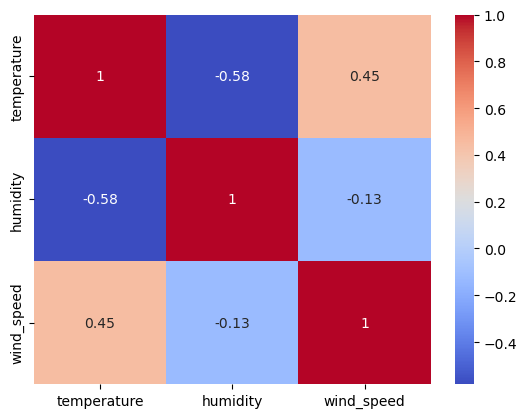

In [74]:
import seaborn as sns
sns.heatmap(df[['temperature','humidity','wind_speed']].corr(), annot=True, cmap="coolwarm")

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

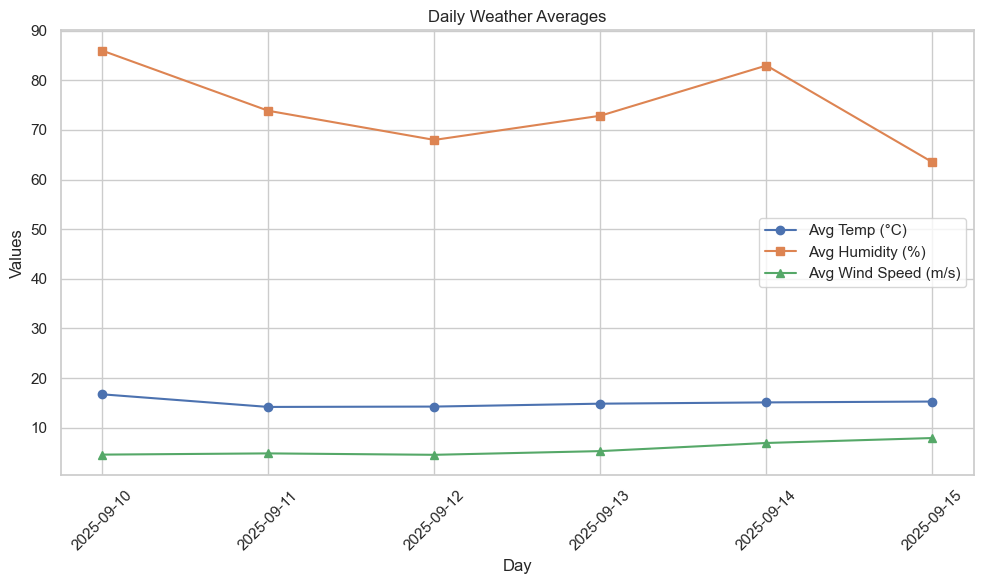

In [96]:
# Style
sns.set(style="whitegrid")

# -------------------------
# 1. Daily Trends
# -------------------------
plt.figure(figsize=(10,6))
plt.plot(daily_summary['Day'], daily_summary['Avg_Temperature'], marker='o', label="Avg Temp (°C)")
plt.plot(daily_summary['Day'], daily_summary['Avg_Humidity'], marker='s', label="Avg Humidity (%)")
plt.plot(daily_summary['Day'], daily_summary['Avg_Wind_Speed'], marker='^', label="Avg Wind Speed (m/s)")
plt.title("Daily Weather Averages")
plt.xlabel("Day")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"daily_weather_summary_{today}.png")
plt.show()

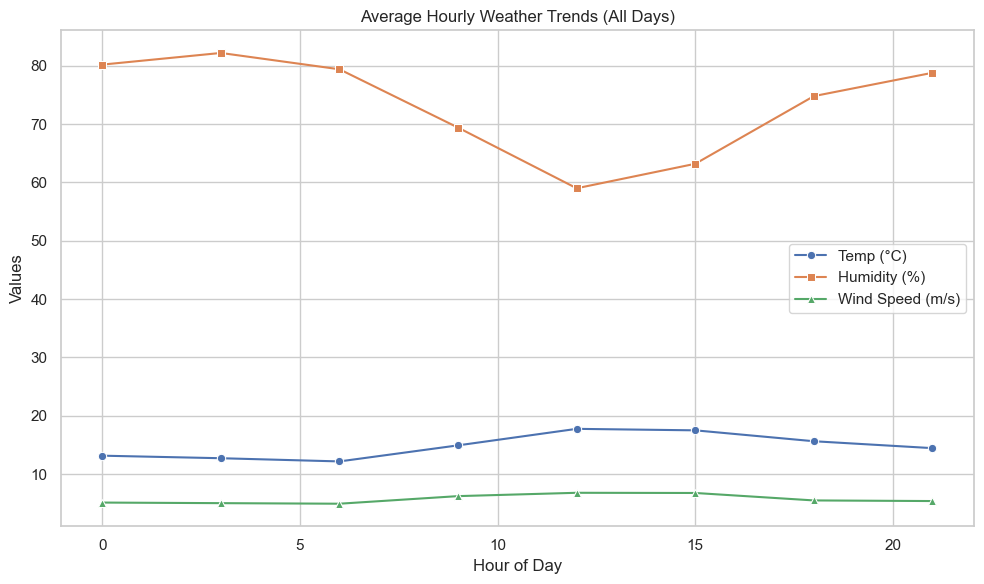

In [97]:
# 2. Hourly Trends
# -------------------------
plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='temperature', data=hourly_summary, marker='o', label="Temp (°C)")
sns.lineplot(x='hour', y='humidity', data=hourly_summary, marker='s', label="Humidity (%)")
sns.lineplot(x='hour', y='wind_speed', data=hourly_summary, marker='^', label="Wind Speed (m/s)")
plt.title("Average Hourly Weather Trends (All Days)")
plt.xlabel("Hour of Day")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.savefig(f"hourly_weather_trends_{today}.png")
plt.show()

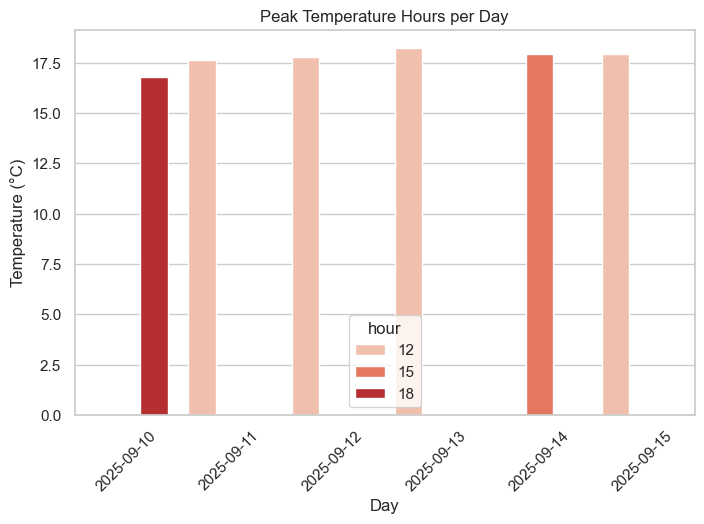

In [98]:
# 3. Peak Temperature Hours
# -------------------------
plt.figure(figsize=(8,5))
sns.barplot(x='day', y='temperature', hue='hour', data=peak_temp_hour, palette="Reds")
plt.title("Peak Temperature Hours per Day")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.savefig(f"peak_temp_hours_{today}.png")
plt.show()


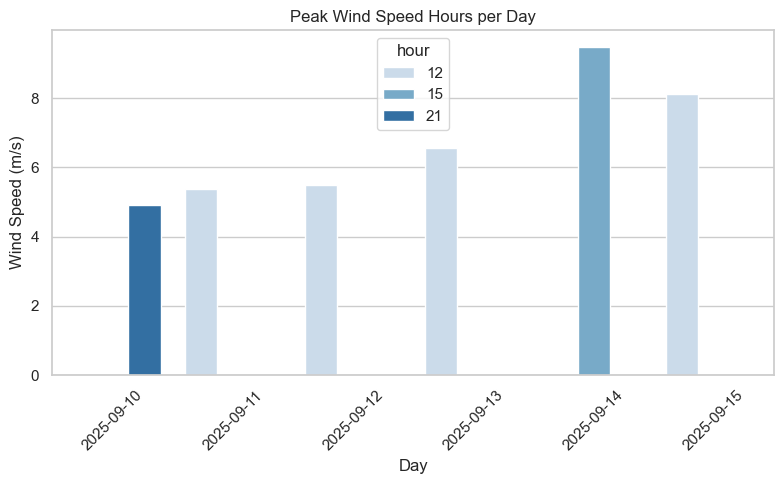

In [99]:
# 4. Peak Wind Hours
# -------------------------
plt.figure(figsize=(8,5))
sns.barplot(x='day', y='wind_speed', hue='hour', data=peak_wind_hour, palette="Blues")
plt.title("Peak Wind Speed Hours per Day")
plt.xlabel("Day")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"peak_wind_hours_{today}.png")
plt.show()

In [84]:
today = datetime.now().strftime('%Y%m%d')

In [83]:
from datetime import datetime